# Auto ML

In [1]:
import pandas as pd
from autogluon.tabular import TabularDataset, TabularPredictor
import utils.eda_utils as eda_utils 
from sklearn.metrics import mean_absolute_error, mean_squared_error, mean_squared_error, r2_score
import numpy as np

d:\rockhead_prediction\.venv\Lib\site-packages\tqdm\auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


## Data Load

In [2]:
train_df = pd.read_csv('data/241001_Rockhead_Seoul_train(before_aumentation).csv')
val_df = pd.read_csv('data/241001_Rockhead_Seoul_val(before_aumentation).csv')
test_df = pd.read_csv('data/241001_Rockhead_Seoul_test(before_aumentation).csv')

C:\Users\user\AppData\Local\Temp\ipykernel_24140\3199273843.py:11: FutureWarning: The behavior of DataFrame concatenation with empty or all-NA entries is deprecated. In a future version, this will no longer exclude empty or all-NA columns when determining the result dtypes. To retain the old behavior, exclude the relevant entries before the concat operation.
  df_concat = pd.concat([df_concat, val_df_copy, train_df_copy, test_df_copy])


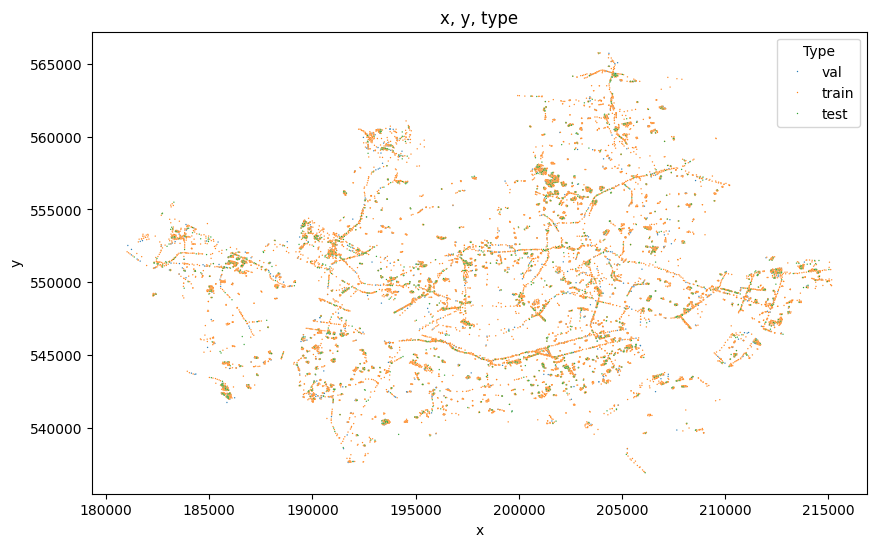

In [3]:
train_df_copy = train_df.copy()
val_df_copy = val_df.copy()
test_df_copy = test_df.copy()


train_df_copy['Type'] = 'train'
val_df_copy['Type'] = 'val'
test_df_copy['Type'] = 'test'

df_concat = pd.DataFrame(columns=train_df_copy.columns)
df_concat = pd.concat([df_concat, val_df_copy, train_df_copy, test_df_copy])

eda_utils.scatter_relation(df_concat, 'x', 'y', 1, 'x, y, type','Type')

In [4]:
train_df['Ground_name'] = train_df['Ground_name'].astype('category')
train_df['Rock type'] = train_df['Rock type'].astype('category')

val_df['Ground_name'] = val_df['Ground_name'].astype('category')
val_df['Rock type'] = val_df['Rock type'].astype('category')

test_df['Ground_name'] = test_df['Ground_name'].astype('category')
test_df['Rock type'] = test_df['Rock type'].astype('category')

In [5]:
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 13306 entries, 0 to 13305
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   x            13306 non-null  float64 
 1   y            13306 non-null  float64 
 2   elevation    13306 non-null  float64 
 3   depth_start  13306 non-null  float64 
 4   Ground_name  13306 non-null  category
 5   Slope        13306 non-null  float64 
 6   Aspect       13306 non-null  float64 
 7   DEM          13306 non-null  float64 
 8   Rock type    13306 non-null  category
dtypes: category(2), float64(7)
memory usage: 754.1 KB


In [6]:
val_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1649 entries, 0 to 1648
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   x            1649 non-null   float64 
 1   y            1649 non-null   float64 
 2   elevation    1649 non-null   float64 
 3   depth_start  1649 non-null   float64 
 4   Ground_name  1649 non-null   category
 5   Slope        1649 non-null   float64 
 6   Aspect       1649 non-null   float64 
 7   DEM          1649 non-null   float64 
 8   Rock type    1649 non-null   category
dtypes: category(2), float64(7)
memory usage: 93.9 KB


In [7]:
test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1648 entries, 0 to 1647
Data columns (total 9 columns):
 #   Column       Non-Null Count  Dtype   
---  ------       --------------  -----   
 0   x            1648 non-null   float64 
 1   y            1648 non-null   float64 
 2   elevation    1648 non-null   float64 
 3   depth_start  1648 non-null   float64 
 4   Ground_name  1648 non-null   category
 5   Slope        1648 non-null   float64 
 6   Aspect       1648 non-null   float64 
 7   DEM          1648 non-null   float64 
 8   Rock type    1648 non-null   category
dtypes: category(2), float64(7)
memory usage: 93.8 KB


## Training-Validation

In [8]:
train = TabularDataset(pd.concat([train_df, val_df]))
test = TabularDataset(test_df.drop(['depth_start'], axis=1))
y_test = test_df['depth_start'].values.tolist()

In [9]:
hyperparameter_tune_kwargs = {  
    'num_trials': 45,
    'scheduler' : 'local',
    'searcher': 'auto',
}

predictor = TabularPredictor(label='depth_start', 
                             problem_type = 'regression', 
                             eval_metric='r2',
                             verbosity =2
                             )

predictor.fit(train,
              num_gpus=1,
              time_limit = 36000, 
              hyperparameter_tune_kwargs=hyperparameter_tune_kwargs,  
              presets="good_quality", 
              save_space = True, 
              keep_only_best = True,
              save_bag_folds = False
              )

2024-10-02 08:05:46,317	INFO timeout.py:54 -- Reached timeout of 1719.319680953026 seconds. Stopping all trials.
2024-10-02 08:05:46,330	INFO tune.py:1016 -- Wrote the latest version of all result files and experiment state to 'D:/rockhead_prediction/AutogluonModels/ag-20241001_152842/models/NeuralNetTorch_BAG_L2' in 0.0105s.
2024-10-02 08:05:56,437	WARNING experiment_analysis.py:190 -- Failed to fetch metrics for 6 trial(s):
- bc3bfbd6: FileNotFoundError('Could not fetch metrics for bc3bfbd6: both result.json and progress.csv were not found at D:/rockhead_prediction/AutogluonModels/ag-20241001_152842/models/NeuralNetTorch_BAG_L2/bc3bfbd6')
- 41a17e55: FileNotFoundError('Could not fetch metrics for 41a17e55: both result.json and progress.csv were not found at D:/rockhead_prediction/AutogluonModels/ag-20241001_152842/models/NeuralNetTorch_BAG_L2/41a17e55')
- 9352627d: FileNotFoundError('Could not fetch metrics for 9352627d: both result.json and progress.csv were not found at D:/rockhead

In [10]:
ld_board = predictor.leaderboard(train, silent=True)

ld_board

,model,score_test,score_val,eval_metric,pred_time_test,pred_time_val,fit_time,pred_time_test_marginal,pred_time_val_marginal,fit_time_marginal,stack_level,can_infer,fit_order
0,XGBoost_BAG_L1\T5_FULL,0.971401,None,r2,0.136023,NaN,1.184707,0.136023,NaN,1.184707,1,True,108
1,XGBoost_BAG_L1\T20_FULL,0.968031,None,r2,0.799141,NaN,7.154755,0.799141,NaN,7.154755,1,True,123
2,XGBoost_BAG_L1\T7_FULL,0.966823,None,r2,0.630611,NaN,5.721004,0.630611,NaN,5.721004,1,True,110
3,XGBoost_BAG_L1\T12_FULL,0.964632,None,r2,6.086568,NaN,20.581112,6.086568,NaN,20.581112,1,True,115
4,LightGBM_BAG_L1\T26_FULL,0.962872,None,r2,0.695622,NaN,5.233418,0.695622,NaN,5.233418,1,True,65
...,...,...,...,...,...,...,...,...,...,...,...,...,...
134,NeuralNetFastAI_BAG_L1\7f0e4e60_FULL,0.422549,None,r2,0.551097,NaN,30.657881,0.551097,NaN,30.657881,1,True,101
135,NeuralNetFastAI_BAG_L1\8bcff7f2_FULL,0.409353,None,r2,0.077013,NaN,1.632883,0.077013,NaN,1.632883,1,True,100
136,NeuralNetFastAI_BAG_L1\ebe340e0_FULL,0.395235,None,r2,0.316556,NaN,16.930471,0.316556,NaN,16.930471,1,True,102
137,NeuralNetFastAI_BAG_L1\c1de2715_FULL,0.288892,None,r2,0.087015,NaN,0.641111,0.087015,NaN,0.641111,1,True,94


## Prediction

In [11]:
pred_y = predictor.predict(test)

In [12]:
mae = mean_absolute_error(y_test, pred_y)
mse = mean_squared_error(y_test, pred_y)
rmse = np.sqrt(mse)
r2 = r2_score(y_test, pred_y)

print('mae: ',mae)
print('mse: ',mse)
print('rmse: ',rmse)
print('r2: ',r2) #1에 가까울수록 좋음

mae:  2.1401165421784505
mse:  9.767692364791303
rmse:  3.1253307608621688
r2:  0.803863484321828
